# Аналитика в Яндекс.Афише

**Содержание**

[Описание проекта](#description)
1. [Общая информация](#start)
2. [Подготовка данных](#preprocessing)
3. [Отчеты и метрики](#reports)  
3.1. [Продукт](#product)  
    * [Сколько людей пользуются в день, неделю, месяц?](#MAU)  
    * [Сколько сессий в день?](#sessions_per_user)
    * [Сколько длится одна сессия?](#ASL)
    * [Как часто люди возвращаются?](#retention)  
3.2 [Продажи](#sale)  
    * [Когда люди начинают покупать?](#days_before_purchase)
    * [Сколько раз покупают за период?](#orders_count)
    * [Какой средний чек?](#orders_revenue)
    * [Сколько денег приносят? (LTV)](#LTV)  
3.3 [Маркетинг](#marketing)  
    * [Сколько денег потратили? Всего / на каждый источник / по времени](#costs)
    * [Сколько стоило привлечение одного покупателя из каждого источника?](#CAC)
    * [На сколько окупились расходы? (ROI)](#ROMI)  
    
4. [Общий вывод](#conclusion)

## Описание проекта <a id="descriptiont"></a>

Стажировка в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.  

В распоряжении имеются данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов. 

Необходимо изучить:
* как люди пользуются продуктом,
* когда они начинают покупать,
* сколько денег приносит каждый клиент
* когда клиент окупается.

**Описание данных**

Таблица `visits` (лог сервера с информацией о посещениях сайта):
* Uid — уникальный идентификатор пользователя
* Device — категория устройства пользователя
* Start Ts — дата и время начала сессии
* End Ts — дата и время окончания сессии
* Source Id — идентификатор рекламного источника, из которого пришел пользователь 

Таблица `orders` (информация о заказах):
* Uid — уникальный id пользователя, который сделал заказ
* Buy Ts — дата и время заказа
* Revenue — выручка Яндекс.Афиши с этого заказа

Таблица `costs` (информация о затратах на маркетинг):
* source_id — идентификатор рекламного источника
* dt — дата
* costs — затраты на этот рекламный источник в этот день

**План работы**

**Шаг 1. Загрузить данные и подготовить их к анализу**  
Загрузить данные о визитах, заказах и расходах в переменные. Оптимизировать данные для анализа. Убедиться, что тип данных в каждой колонке — правильный. Путь к файлам:  
*/datasets/visits_log.csv*  
*/datasets/orders_log.csv*  
*/datasets/costs.csv*  

**Шаг 2. Построить отчёты и посчитать метрики**  

Продукт  
* Сколько людей пользуются в день, неделю, месяц?  
* Сколько сессий в день?  
* Сколько длится одна сессия?  
* Как часто люди возвращаются?   

Продажи  
* Когда люди начинают покупать?  
* Сколько раз покупают за период?  
* Какой средний чек?  
* Сколько денег приносят? (LTV)  

Маркетинг  
* Сколько денег потратили? Всего / на каждый источник / по времени  
* Сколько стоило привлечение одного покупателя из каждого источника?  
* На сколько окупились расходы? (ROI)  

Отобразить на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?  

**Шаг 3. Написать вывод**: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?  
Какие источники/платформы вы бы порекомендовали? Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? Какие выводы вы сделали, узнав значение метрик?

## 1. Общая информация <a id="start"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Загрузим данные о визитах (`visits`), заказах (`orders`) и расходах (`costs`) и рассмотрим общую информацию по таблицам.

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
costs = pd.read_csv('/datasets/costs.csv')
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


#### Вывод

План подготовки данных для анализа:
* переименовать столбцы в таблицах: привести к нижнему регистру и заменить пробелы,
* преобразовать данные в столбцах с датами в формат даты,
* проверить совпадают ли диапазоны дат в таблицах.

## 2. Подготовка данных <a id="preprocessing"></a>

Переименуем столбцы.

In [8]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [9]:
visits.columns = ['device', 'session_end_ts', 'source_id', 'session_start_ts', 'uid']

In [10]:
orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [11]:
orders.columns = ['order_date', 'revenue', 'uid']

In [12]:
costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [13]:
costs.columns = ['source_id', 'date', 'costs']

Преобразуем даты в таблицах в формат datetime.

In [14]:
visits['session_end_ts'] = pd.to_datetime(visits['session_end_ts'])
visits['session_start_ts'] = pd.to_datetime(visits['session_start_ts'])
orders['order_date'] = pd.to_datetime(orders['order_date'])
costs['date'] = pd.to_datetime(costs['date'])

In [15]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device              359400 non-null object
session_end_ts      359400 non-null datetime64[ns]
source_id           359400 non-null int64
session_start_ts    359400 non-null datetime64[ns]
uid                 359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
order_date    50415 non-null datetime64[ns]
revenue       50415 non-null float64
uid           50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
date         2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Рассмотрим диапазоны дат в таблицах.

In [18]:
visits['session_start_ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: session_start_ts, dtype: object

In [19]:
visits['session_end_ts'].describe()

count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: session_end_ts, dtype: object

In [20]:
orders['order_date'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: order_date, dtype: object

In [21]:
costs['date'].describe() 

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: date, dtype: object

В таблицах представлены данные за один год с 01.06.2017 по 31.05.2018. В таблице `visits` присутстуют сеансы с датой завершения 01.06.2018, и в таблице  `orders` есть заказы за эту дату. За дату сеанса примем дату *session_start_ts*, поэтому все сеансы в таблице `visits` оставим неизменными. В таблице `orders` удалим заказы за 01.06.2018.

In [22]:
orders = orders[orders['order_date'] <= '2018-06-01 00:00:00']

In [23]:
orders['order_date'].describe()

count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: order_date, dtype: object

#### Вывод

* Переименованы столбцы в таблицах.
* Данные в столбцах с датами преобразованы в формат datetime.
* Удален один заказ из таблицы `orders` с датой заказа 01.06.2018.

## 3.Отчеты и метрики <a id="reports"></a>

### Продукт <a id="product"></a>

#### Сколько людей пользуются в день, неделю, месяц? <a id="MAU"></a>

Рассмотрим активных пользователей в трёх измерениях:
* DAU (от англ. daily active users) — количество уникальных пользователей в день;
* WAU (от англ. weekly active users) — количество уникальных пользователей в неделю;
* MAU (от англ. monthly active users) — количество уникальных пользователей в месяц.  

Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [24]:
visits['session_year']  = visits['session_start_ts'].dt.year
visits['session_month'] = visits['session_start_ts'].dt.month
visits['session_week']  = visits['session_start_ts'].dt.week
visits['session_date'] = visits['session_start_ts'].dt.date
visits.head()

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


Посчитаем метрики, сгруппировав данные по уникальным пользователям и найдя среднее.

In [25]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print('DAU =', int(dau_total))
print('WAU =', int(wau_total)) 
print('MAU =', int(mau_total)) 

DAU = 907
WAU = 5716
MAU = 23228


Рассмотрим как изменялась метрика MAU по месяцам.

In [26]:
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau

uid
session_year session_month       
2017         6              13259
             7              14183
             8              11631
             9              18975
             10             29692
             11             32797
             12             31557
2018         1              28716
             2              28749
             3              27473
             4              21008
             5              20701

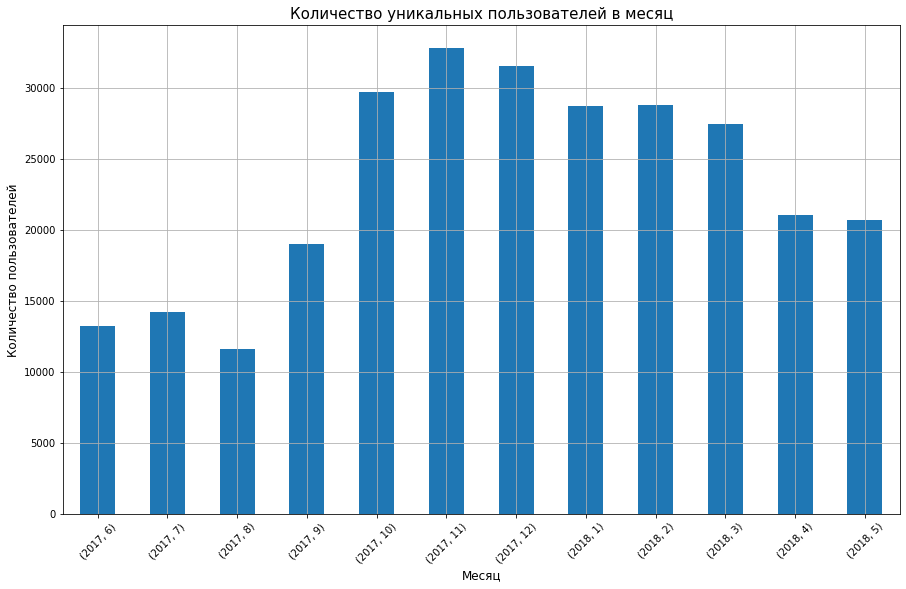

In [27]:
mau.plot(figsize=(15,9), kind = 'bar', rot=45, legend=False, grid=True)
plt.title('Количество уникальных пользователей в месяц', fontsize = 15)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.show()

Рассмотрим, как отличается количество уникальных пользователей в месяц, пришедших с разных рекламных источников.

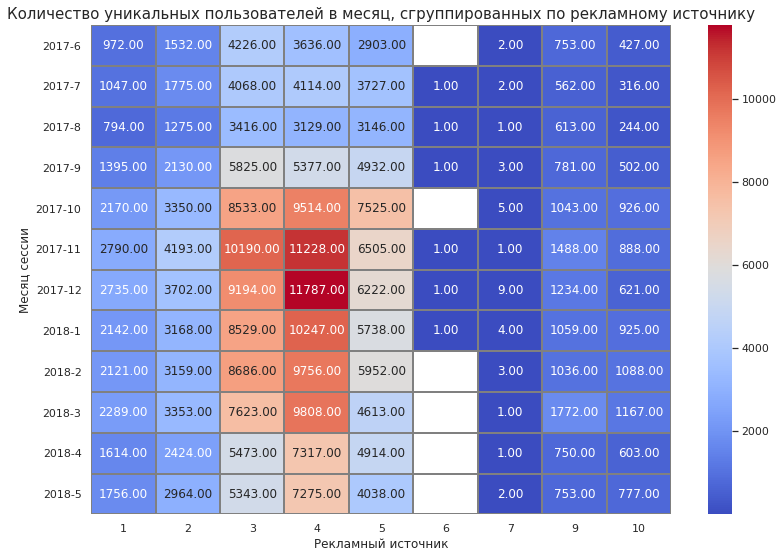

In [28]:
mau_by_source = visits.pivot_table(
    index=['session_year', 'session_month'], 
    columns='source_id', 
    values='uid', 
    aggfunc='nunique')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Количество уникальных пользователей в месяц, сгруппированных по рекламному источнику', fontsize = 15)
ax = sns.heatmap(mau_by_source, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm')
ax.set(xlabel= 'Рекламный источник',
           ylabel= 'Месяц сессии')
plt.show()

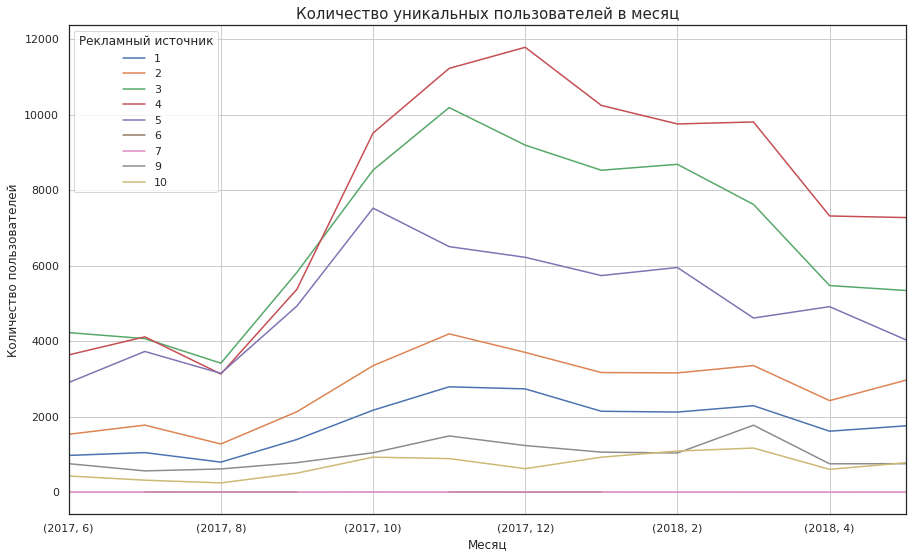

In [29]:
mau_by_source.plot(figsize=(15,9), rot=0, legend=True, grid=True)
plt.title('Количество уникальных пользователей в месяц', fontsize = 15)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.legend(title = 'Рекламный источник')
plt.show()

Сделаем срез в MAU по устройствам.

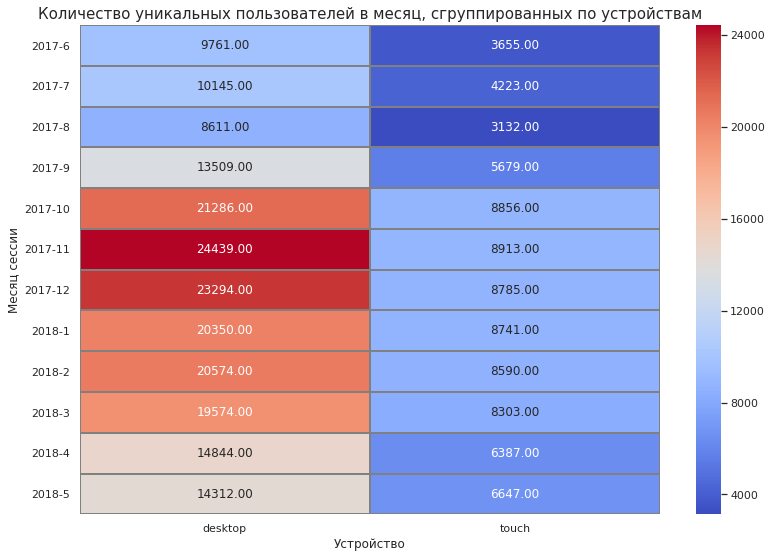

In [30]:
mau_by_device = visits.pivot_table(index=['session_year', 'session_month'], columns='device', values='uid', aggfunc='nunique')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Количество уникальных пользователей в месяц, сгруппированных по устройствам', fontsize = 15)
ax = sns.heatmap(mau_by_device, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm')
ax.set(xlabel= 'Устройство',
           ylabel= 'Месяц сессии')
plt.show()

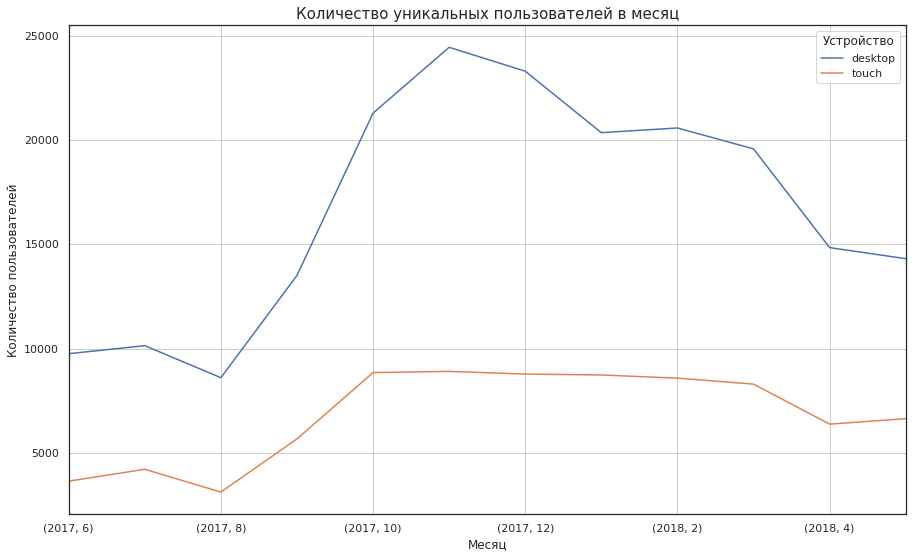

In [31]:
mau_by_device.plot(figsize=(15,9), rot=0, legend=True, grid=True)
plt.title('Количество уникальных пользователей в месяц', fontsize = 15)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.legend(title = 'Устройство')
plt.show()

#### Вывод

Ежедневно сайт Яндекс.Афиши посещает в среднем 907 новых пользователей, 5716 новых пользователей в неделю и 23228 - в месяц. Большинство из них заходят с desctop-устройств. Это может быть связано с тем, что удобнее просматривать события и совершать покупки билетов на desctop-устройствах, тогда как на touch-устройствах может предлагаться на разных рекламных источниках использование приложений, что также уменьшает визиты именно на сайт с touch-устройств.  
Самым посещаемым месяцем стал ноябрь 2017 года, в период с октября по март сайт посещало большее количество новых пользователей, чем в остальной период. Возможно такое распределение связано с сезонностью - в зимний период чаще посещают мероприятия, чем летом, поэтому в поисках билетов больше новых пользователей заходит на сайт. Также увеличение может быть связано с тем, что в эти месяцы увеличились расходы на привлечение новых пользователей и они дали результат.  
Лучшим рекламным источником является 4, на втором и третьем месте - источники 3 и 5. С 6 и 7 рекламных источников приходит наименьшее количество новых пользователей, при этом с источника 8 - нет ни одного. Возможно он не направлен на привлечение новых пользователей, как email-рассылка, а на удержание существующих.

#### Сколько сессий в день? <a id="sessions_per_user"></a>

Определим регулярность использования сайта: разделим число сессий на количество пользователей за день.

In [32]:
sessions_per_user = visits.groupby(['session_date']).agg({'uid': ['count','nunique']}).reset_index()
sessions_per_user.columns = ['session_date', 'n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user['sessions_per_user'].mean()

1.082169644003972

Рассмотрим изменения метрики по месяцам.

In [33]:
sessions_per_user['session_date'] = pd.to_datetime(sessions_per_user['session_date'])
sessions_per_user['session_year'] = sessions_per_user['session_date'].dt.year
sessions_per_user['session_month'] = sessions_per_user['session_date'].dt.month
sessions_per_user_by_month = sessions_per_user.groupby(['session_year', 'session_month'])['sessions_per_user'].agg('mean')
sessions_per_user_by_month

session_year  session_month
2017          6                1.073938
              7                1.077657
              8                1.066927
              9                1.076044
              10               1.077773
              11               1.093053
              12               1.090265
2018          1                1.085976
              2                1.089924
              3                1.087141
              4                1.079686
              5                1.088130
Name: sessions_per_user, dtype: float64

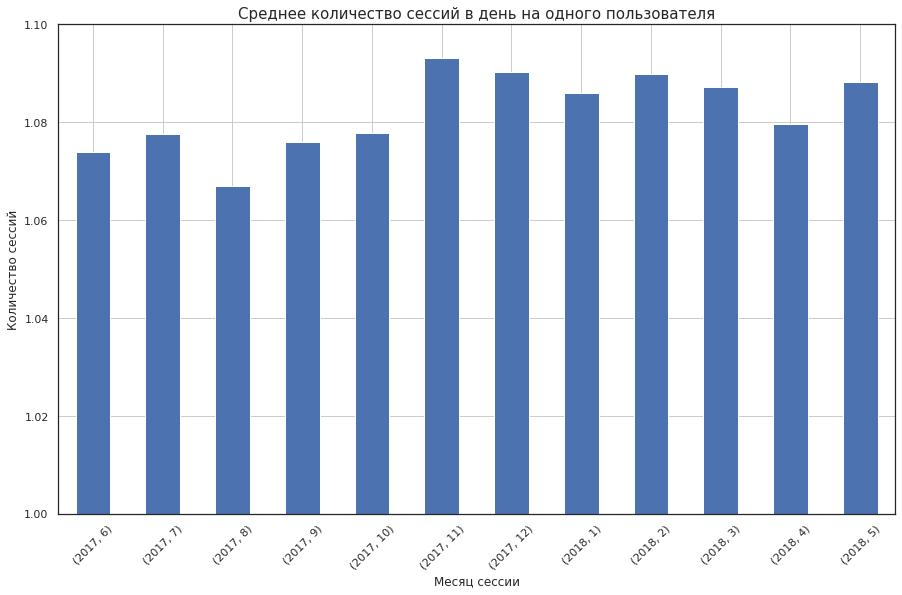

In [34]:
sessions_per_user_by_month.plot(figsize=(15,9), kind = 'bar', rot=45, legend=False, grid=True,  ylim = (1, 1.1))
plt.title('Среднее количество сессий в день на одного пользователя', fontsize = 15)
plt.ylabel('Количество сессий', fontsize=12)
plt.xlabel('Месяц сессии', fontsize=12)
plt.show()

Определим, зависит ли количество сессий от устройств.

In [35]:
sessions_per_user_by_device = visits.groupby(['session_date', 'device']).agg({'uid': ['count','nunique']}).reset_index()
sessions_per_user_by_device.columns = ['session_date', 'device', 'n_sessions', 'n_users']
sessions_per_user_by_device['sessions_per_user'] = sessions_per_user_by_device['n_sessions'] / sessions_per_user_by_device['n_users']

sessions_per_user_by_device['session_date'] = pd.to_datetime(sessions_per_user_by_device['session_date'])
sessions_per_user_by_device['session_year'] = sessions_per_user_by_device['session_date'].dt.year
sessions_per_user_by_device['session_month'] = sessions_per_user_by_device['session_date'].dt.month
sessions_per_user_by_month = sessions_per_user_by_device.pivot_table(
    index=['session_year', 'session_month'], 
    columns = 'device', 
    values='sessions_per_user', 
    aggfunc='mean')
sessions_per_user_by_month

device                       desktop     touch
session_year session_month                    
2017         6              1.081237  1.040644
             7              1.083184  1.049405
             8              1.073400  1.036263
             9              1.082196  1.048929
             10             1.081412  1.052743
             11             1.094180  1.069149
             12             1.093975  1.065153
2018         1              1.094708  1.053367
             2              1.099656  1.051300
             3              1.095591  1.053626
             4              1.089369  1.041997
             5              1.099322  1.049981

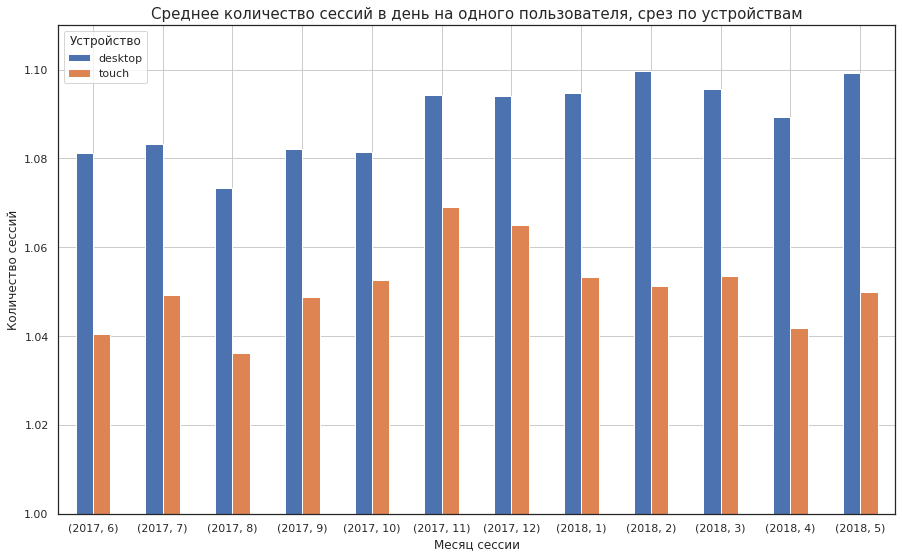

In [36]:
sessions_per_user_by_month.plot(figsize=(15,9), kind = 'bar', ylim = (1, 1.11), rot=0, legend=True, grid=True)
plt.title('Среднее количество сессий в день на одного пользователя, срез по устройствам', fontsize = 15)
plt.ylabel('Количество сессий', fontsize=12)
plt.xlabel('Месяц сессии', fontsize=12)
plt.legend(title = 'Устройство')
plt.show()

In [37]:
sessions_per_user_by_month.mean()

device
desktop    1.089019
touch      1.051046
dtype: float64

Рассмотрим среднее количество сессий в месяц.

In [38]:
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user['sessions_per_user'].mean()

1.2808894945992668

#### Вывод

В среднем пользователь на сайт заходит раз в день. Только 8% пользователей возвращается на сайт в день и 28% в месяц. Поиск и покупка билетов на мероприятия - не регулярное занятие россиян, поэтому показатель довольно низкий и не сильно меняется по времени. Однако с touch-устройств показатель количества сессий меньше, чем с desktop-устройств: 1,05 и 1,09 соответственно. Возможно пользователей что-то не устраивает в мобильной версии сайта.

#### Сколько длится одна сессия? <a id="ASL"></a>

Найдем среднюю продолжительность сессии или ASL (англ. average session length).

In [39]:
visits['session_duration_sec'] = (visits['session_end_ts'] - visits['session_start_ts']).dt.seconds
visits['session_duration_sec'].mean()

643.506488592098

In [40]:
visits['session_duration_sec'].median()

300.0

Среднее значение и медиана продолжительности сессии сильно различаются, рассмотрим распределение ASL.

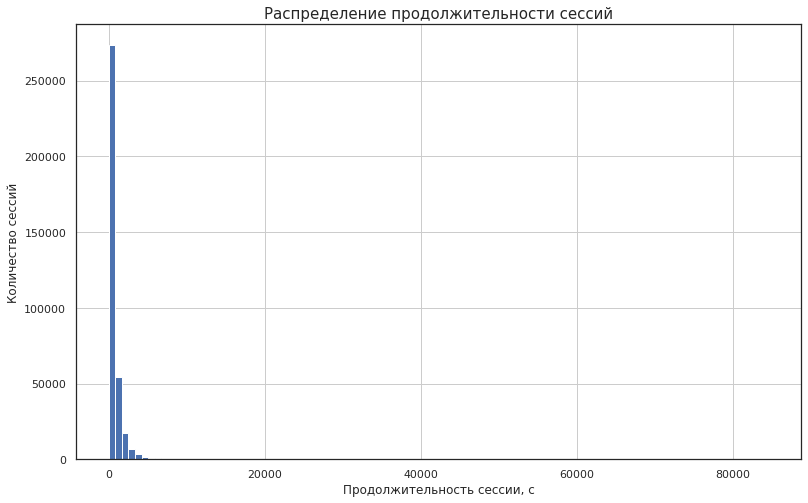

In [41]:
visits['session_duration_sec'].hist(bins=100, figsize=(13,8))
plt.title('Распределение продолжительности сессий', fontsize = 15)
plt.ylabel('Количество сессий', fontsize=12)
plt.xlabel('Продолжительность сессии, с', fontsize=12)
plt.show()

In [42]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

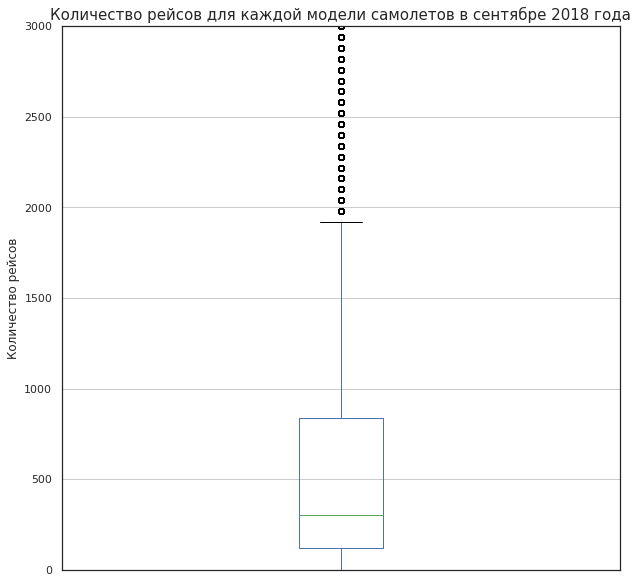

In [43]:
visits.boxplot(column='session_duration_sec', figsize=(10, 10))
plt.title('Количество рейсов для каждой модели самолетов в сентябре 2018 года', fontsize = 15)
plt.ylim(0,3000)
plt.xticks([])
plt.ylabel('Количество рейсов', fontsize=12)
plt.show()

Рассмотрим изменение продолжительности сессии по устройствам.

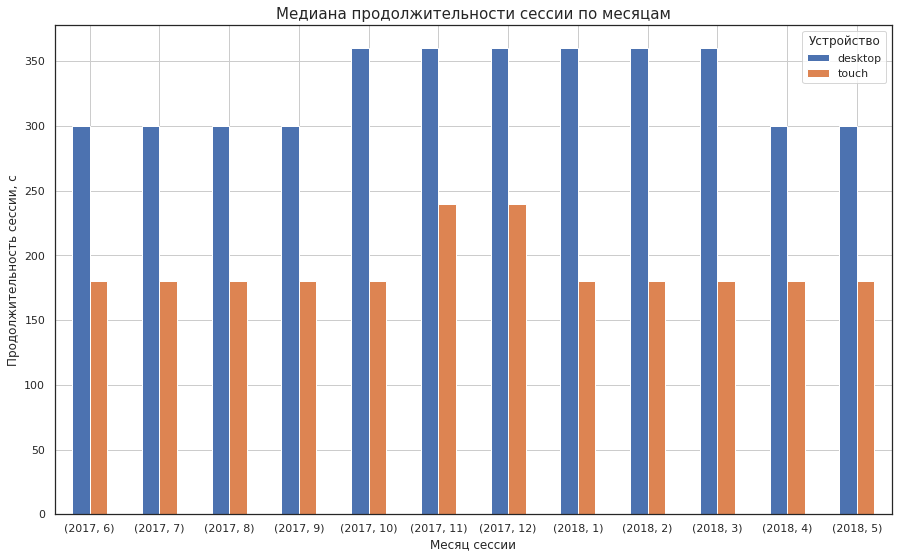

In [44]:
session_duration_by_device = visits.pivot_table(
    index =['session_year', 'session_month'], 
    columns = 'device', 
    values = 'session_duration_sec', 
    aggfunc ='median')
session_duration_by_device.plot(figsize=(15,9), kind = 'bar', rot=0, legend=True, grid=True)
plt.title('Медиана продолжительности сессии по месяцам', fontsize = 15)
plt.ylabel('Продолжительность сессии, с', fontsize=12)
plt.xlabel('Месяц сессии', fontsize=12)
plt.legend(title = 'Устройство')
plt.show()

In [45]:
session_duration_by_device.mean()

device
desktop    330.0
touch      190.0
dtype: float64

Выведем среднее значение и медиану продолжительности сесси по месяцам.

In [46]:
session_duration_by_month = visits.groupby(['session_year', 'session_month']).agg({'session_duration_sec': ['median','mean']})
session_duration_by_month

session_duration_sec            
                                         median        mean
session_year session_month                                 
2017         6                              300  600.024114
             7                              300  604.636246
             8                              240  589.093905
             9                              300  597.190446
             10                             300  614.486083
             11                             300  713.407605
             12                             300  694.679632
2018         1                              300  653.000054
             2                              300  645.147168
             3                              300  661.344685
             4                              300  600.746936
             5                              300  615.826206

#### Вывод

Распределение продолжительности сессии имеет пик около 0 секунд и скошено вправо. 50% пользователей проводят на сайте от 2 до 14 минут. В августе 2017 года наблюдалось снижение продолжительности сессии. C desktop-устройств медиана продолжительности сессии выше, чем с touch-устройств: 330 и 190 секунд соответственно.

#### Как часто люди возвращаются? <a id="retention"></a>

Посчитаем метрику Retention Rate: сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.  
Найдем для каждого пользователя дату первой сессии.

In [47]:
first_activity_date = visits.groupby(['uid'])['session_start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='uid')
visits.head()

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00


Сформируем когорты по  данным за месяц.

In [48]:
visits['activity_month'] = visits['session_start_ts'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits.head()

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date,activity_month,first_activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-05-01,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01


Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты.

In [49]:
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

Сгруппируем данные по когорте и lifetime.

In [50]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждый следующий месяц.
Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц.

In [51]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count

,first_activity_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Объединим данные по когортам с исходным количеством пользователей в когорте.

In [52]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

Рассчитаем Retention Rate. Разделим количество активных пользователей в каждый из месяцев на исходное число пользователей в когорте.

In [53]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

Построим сводную таблицу и создадим тепловую карту:

In [54]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


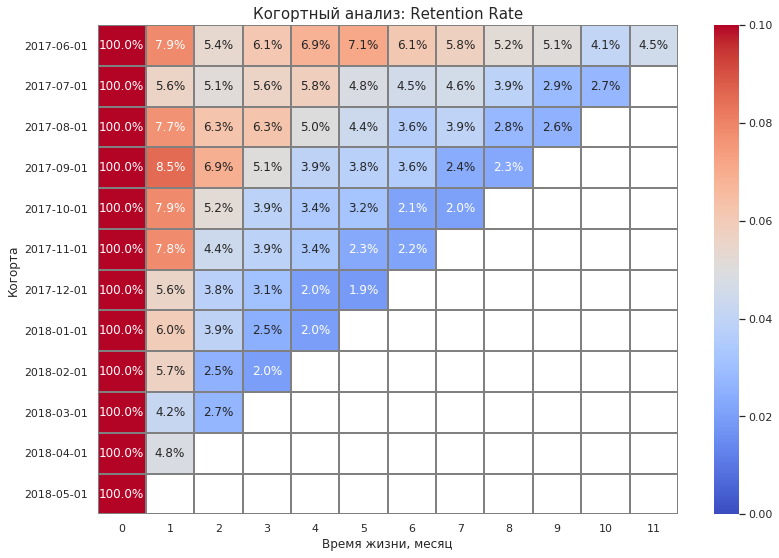

In [55]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когортный анализ: Retention Rate', fontsize = 15)
ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap= 'coolwarm', vmin=0, vmax=0.1)
ax.set(xlabel= 'Время жизни, месяц',
           ylabel= 'Когорта')
ax.set_yticklabels(retention_pivot.index.date)
plt.show()

Посчитаем средние показатели для каждого месяца жизни.

In [56]:
retention_pivot.mean(axis=0)

cohort_lifetime
0     1.000000
1     0.065167
2     0.046333
3     0.042760
4     0.040595
5     0.039444
6     0.036957
7     0.037509
8     0.035465
9     0.035159
10    0.034062
11    0.044951
dtype: float64

#### Вывод

Т.к. сайт Яндекс.Афиша не предполагает регулярного использования, среднее количество сессий в месяц на одного человека всего 1,28, то коэффициент удержания пользователей довольно низкий: в первый месяц Retention Rate в среднем составляет 6,5%. С каждой новой когортой поведение пользователей меняется. Наблюдается убывание Retention Rate: в мартовской и апрельской когорте в 1 месяц вернулось меньше 5% пользователей, с 4 месяца жизни показатель удержания клиентов уменьшается с каждой новой когортой. Возможно, были выбраны неэффективные источники трафика.

### 3.2 Продажи <a id="sale"></a>

#### Когда люди начинают покупать? <a id="days_before_purchase"></a>

Определим, через сколько времени после первого посещения люди начинают покупать.  
Добавим в таблицу `visits` дату первой покупки.

In [57]:
first_purchase_date = orders.groupby(['uid'])['order_date'].min()
first_purchase_date.name = 'first_purchase_date'
visits = visits.join(first_purchase_date, on='uid')

In [58]:
visits.head()

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date,activity_month,first_activity_month,cohort_lifetime,first_purchase_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0,NaT
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0,NaT
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0,NaT
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-05-01,2018-03-01,2,2018-03-09 20:25:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0,NaT


Проверим, что количество покупателей совпадает.

In [59]:
orders['uid'].nunique()

36522

In [60]:
visits[~visits['first_purchase_date'].isna()]['uid'].nunique()

36522

Вычислим количество дней до покупки для каждого пользователя и посчитаем среднее.

In [61]:
visits['days_before_purchase'] = (visits['first_purchase_date'] - visits['first_activity_date']) / np.timedelta64(1,'D')
visits.head()

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date,activity_month,first_activity_month,cohort_lifetime,first_purchase_date,days_before_purchase
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0,NaT,NaN
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0,NaT,NaN
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0,NaT,NaN
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-05-01,2018-03-01,2,2018-03-09 20:25:00,0.013889
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0,NaT,NaN


In [62]:
buyers = visits.drop_duplicates(subset=['uid'])
buyers['days_before_purchase'].mean()

16.903362642151766

In [63]:
buyers['days_before_purchase'].median()

0.011111111111111112

Рассмотрим распределение количества дней до покупки.

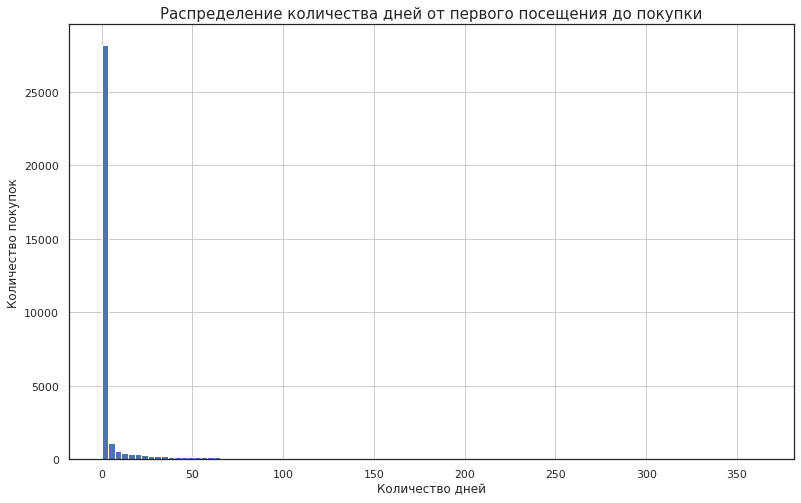

In [64]:
buyers['days_before_purchase'].hist(bins=100, figsize=(13,8))
plt.title('Распределение количества дней от первого посещения до покупки', fontsize = 15)
plt.ylabel('Количество покупок', fontsize=12)
plt.xlabel('Количество дней', fontsize=12)
plt.show()

Вычислим значение, которое встречается наиболее часто.

In [65]:
buyers['days_before_purchase'].round().mode()

0    0.0
dtype: float64

Рассмотрим  распределение по времени медианы дней от первого посещения до покупки.

In [66]:
days_before_purchase_by_month = buyers.groupby('first_activity_month').agg({'days_before_purchase':'median'})
days_before_purchase_by_month

,days_before_purchase
first_activity_month,
2017-06-01,0.016667
2017-07-01,0.018056
2017-08-01,0.013889
2017-09-01,0.016667
2017-10-01,0.011806
2017-11-01,0.020833
2017-12-01,0.012500
2018-01-01,0.010417
2018-02-01,0.008333


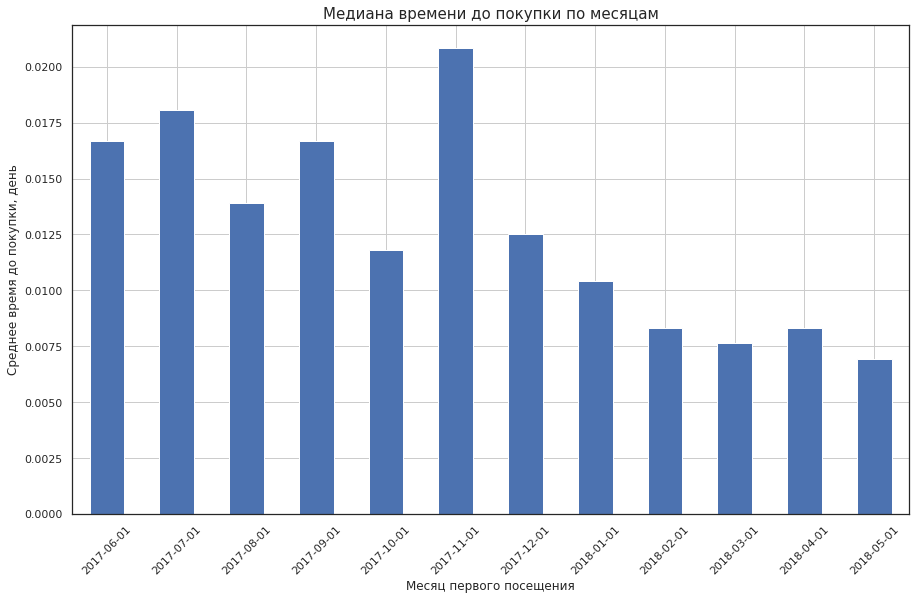

In [67]:
ax = days_before_purchase_by_month['days_before_purchase'].plot(figsize=(15,9), kind = 'bar', rot=45, legend=False, grid=True)
plt.title('Медиана времени до покупки по месяцам', fontsize = 15)
plt.ylabel('Среднее время до покупки, день', fontsize=12)
plt.xlabel('Месяц первого посещения', fontsize=12)
ax.set_xticklabels(days_before_purchase_by_month.index.date)
plt.show()

Чтобы снизить влияние очень больших промежутков времени между первым посещением и первым заказом, которых может быть больше для более ранних посетителей сайта, рассмотрим только те первые заказы, время до которых не больше 1 дня. Проверим, сохранится ли снижение времени до покупки в течение последних месяцев на графике.

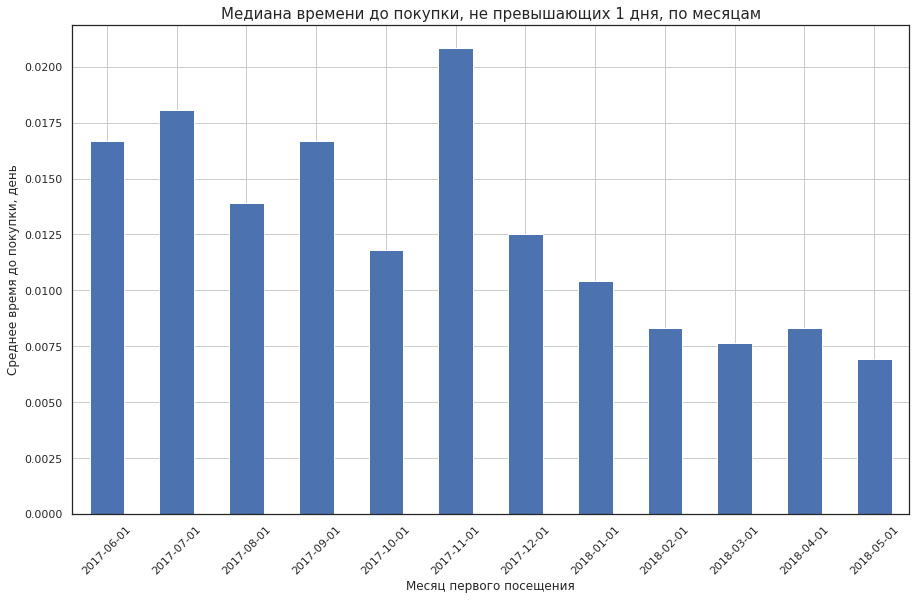

In [68]:
ax = days_before_purchase_by_month.query('days_before_purchase <= 1')['days_before_purchase'].plot(
    figsize=(15,9), kind = 'bar', rot=45, legend=False, grid=True)
plt.title('Медиана времени до покупки, не превышающих 1 дня, по месяцам', fontsize = 15)
plt.ylabel('Среднее время до покупки, день', fontsize=12)
plt.xlabel('Месяц первого посещения', fontsize=12)
ax.set_xticklabels(days_before_purchase_by_month.index.date)
plt.show()

#### Вывод

Большинство покупок совершается в течение одного дня. 50% покупают за менее, чем 40 секунд (медиана дней до покупки = 0,011). Т.о. обычно пользователи не выбирают мероприятия на сайте, а попадая через рекламные источники сразу переходят к покупке интересующих билетов.  
В ноябре 2017 года было повышение медианы времени до покупки - больше минуты проходит от начала сеанса до покупки. В последующие месяцы наблюдается снижение этого времени. Возможно, к этому привели улучшения в сервисе выбора мест и оплаты покупки на сайте.

#### Сколько раз покупают за период? <a id="orders_count"></a>

Рассмотрим количество покупок по месяцам.

In [69]:
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

In [70]:
orders_count_by_months = orders.groupby('order_month')['uid'].agg('count')
orders_count_by_months

order_month
2017-06-01    2354
2017-07-01    2363
2017-08-01    1807
2017-09-01    3387
2017-10-01    5679
2017-11-01    5659
2017-12-01    6218
2018-01-01    4721
2018-02-01    5281
2018-03-01    5326
2018-04-01    3273
2018-05-01    4346
Name: uid, dtype: int64

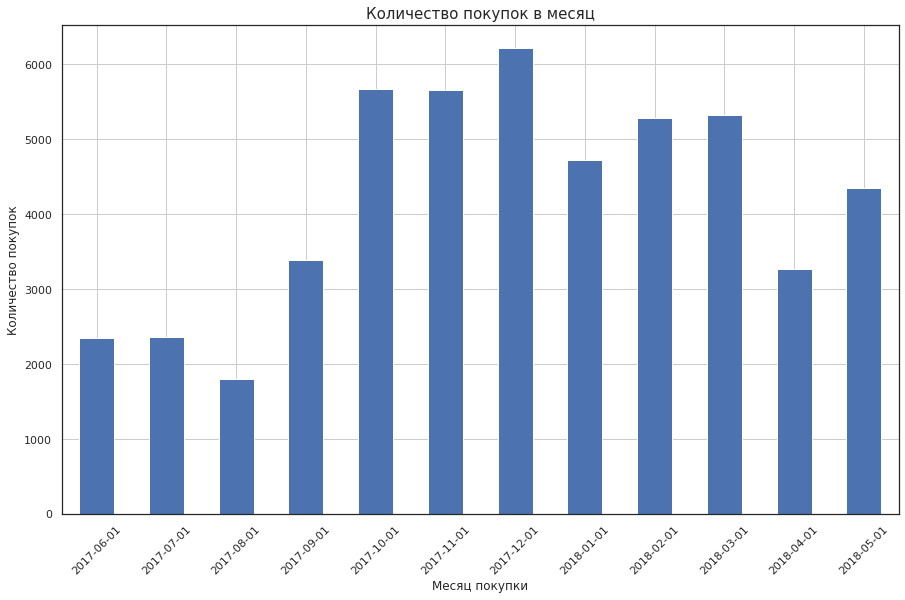

In [71]:
ax = orders_count_by_months.plot(figsize=(15,9), kind = 'bar', legend=False, grid=True, rot = 45)
plt.title('Количество покупок в месяц', fontsize = 15)
plt.ylabel('Количество покупок', fontsize=12)
plt.xlabel('Месяц покупки', fontsize=12)
ax.set_xticklabels(orders_count_by_months.index.date)
plt.show()

Расчет количества покупок на одного покупателя проведем по когортам, сформированным по месяцам. Получим месяц первой покупки каждого покупателя.

In [72]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Посчитаем количество новых покупателей (n_buyers) за каждый месяц.

In [73]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Добавим месяц первой покупки каждого покупателя в таблицу с заказами.

In [74]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head()

,order_date,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


Рассчитаем количество покупок для каждой когорты по месяцам.

In [75]:
cohorts = orders_new.groupby(['first_order_month','order_month'])['uid'].count().reset_index()
cohorts.columns = ['first_order_month', 'order_month', 'n_orders']
cohorts.head()

,first_order_month,order_month,n_orders
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [76]:
orders_count_report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
orders_count_report.head()

,first_order_month,n_buyers,order_month,n_orders
0,2017-06-01,2023,2017-06-01,2354
1,2017-06-01,2023,2017-07-01,177
2,2017-06-01,2023,2017-08-01,174
3,2017-06-01,2023,2017-09-01,226
4,2017-06-01,2023,2017-10-01,292


In [77]:
orders_count_report['lifetime'] = (orders_count_report['order_month'] - orders_count_report['first_order_month']) / np.timedelta64(1, 'M')
orders_count_report['lifetime'] = orders_count_report['lifetime'].round().astype('int')
orders_count_report.head()

,first_order_month,n_buyers,order_month,n_orders,lifetime
0,2017-06-01,2023,2017-06-01,2354,0
1,2017-06-01,2023,2017-07-01,177,1
2,2017-06-01,2023,2017-08-01,174,2
3,2017-06-01,2023,2017-09-01,226,3
4,2017-06-01,2023,2017-10-01,292,4


Разделим количество заказов когорт за каждый месяц на общее число покупателей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы. Отобразим нарастающим итогом.

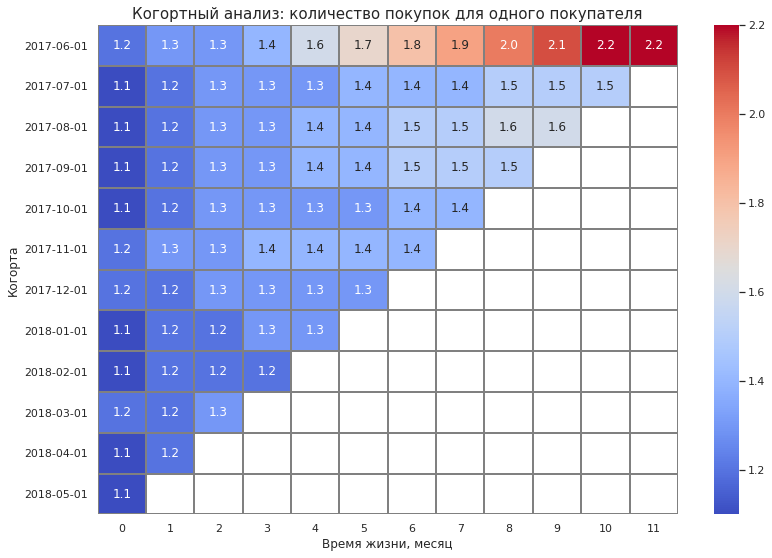

In [78]:
orders_count_report['orders_per_buyer'] = orders_count_report['n_orders'] / orders_count_report['n_buyers']
    
orders_count_per_buyer = orders_count_report.pivot_table(
        index='first_order_month', 
        columns='lifetime', 
        values='orders_per_buyer', 
        aggfunc='mean').cumsum(axis=1).round(1)
    
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когортный анализ: количество покупок для одного покупателя', fontsize = 15)
ax = sns.heatmap(orders_count_per_buyer, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap= 'coolwarm')
ax.set(xlabel= 'Время жизни, месяц',
           ylabel= 'Когорта')
ax.set_yticklabels(orders_count_per_buyer.index.date)
plt.show()

Рассчитаем среднее количество покупок для каждого месяца жизни когорт.

In [79]:
orders_count_per_buyer.mean()

lifetime
0     1.133333
1     1.218182
2     1.280000
3     1.311111
4     1.375000
5     1.414286
6     1.500000
7     1.540000
8     1.650000
9     1.733333
10    1.850000
11    2.200000
dtype: float64

#### Вывод

Также как и посещаемость сайта, количество покупок в период с октября по март выше, чем в остальные месяцы. Больше всего заказов в декабре (6218): в этом месяце повышается спрос в новогодние каникулы на театральные и цирковые представления, мюзиклы, детские и спортивные мероприятия. В летние месяцы количество заказов снижается: в августе всего 1807 заказов.    
Количество заказов на одного покупателя растет с течением времени жизни когорты очень медленно, к концу 12 месяца этот показатель составляет всего 2,2.

#### Какой средний чек? <a id="orders_revenue"></a>

Определим среднюю выручку Яндекс.Афиши с одного заказа.

In [80]:
orders['revenue'].mean()

4.9996782639742925

Рассмотрим изменение средней выручки по месяцам.

In [81]:
orders_revenue_by_months = orders.groupby('order_month')['revenue'].agg('mean')
orders_revenue_by_months

order_month
2017-06-01    4.060106
2017-07-01    5.306589
2017-08-01    4.847139
2017-09-01    5.416448
2017-10-01    4.928280
2017-11-01    4.783518
2017-12-01    5.852139
2018-01-01    4.112927
2018-02-01    4.840095
2018-03-01    5.413930
2018-04-01    5.150645
2018-05-01    4.771279
Name: revenue, dtype: float64

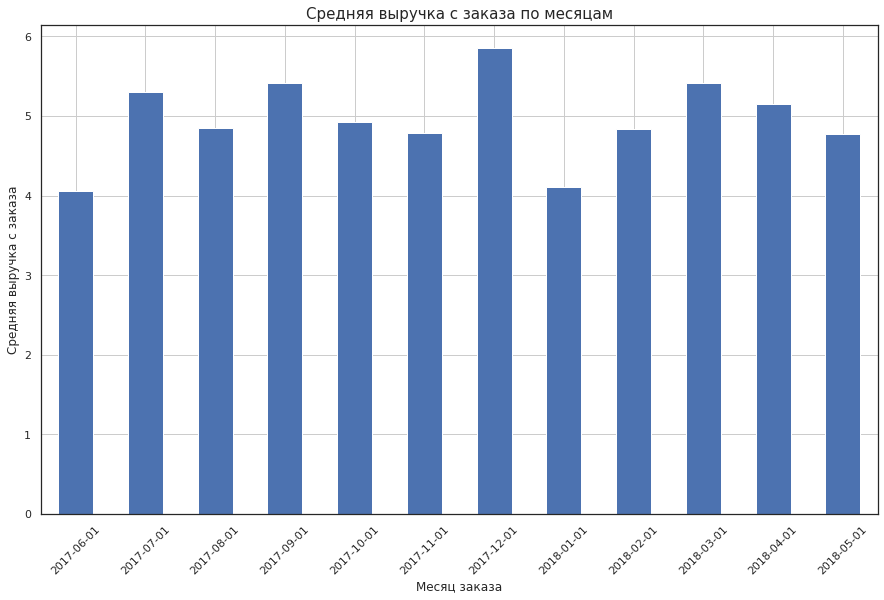

In [82]:
ax = orders_revenue_by_months.plot(figsize=(15,9), kind = 'bar', legend=False, grid=True, rot = 45)
plt.title('Средняя выручка с заказа по месяцам', fontsize = 15)
plt.ylabel('Средняя выручка с заказа', fontsize=12)
plt.xlabel('Месяц заказа', fontsize=12)
ax.set_xticklabels(orders_revenue_by_months.index.date)
plt.show()

#### Вывод

Средняя выручка с одного заказа равна 5, в декабре средняя выручка с заказа была максимальной - 5,9. 

#### Сколько денег приносят? (LTV) <a id="LTV"></a>

Вычислим LTV (от англ. lifetime value) — «пожизненная» ценность клиента. LTV посчитаем по когортам, сформированным по месяцам.

Рассчитаем выручку для каждой когорты по месяцам.

In [83]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Добавим в таблицу `cohorts` данные о том, сколько людей первый раз совершили покупку в каждый месяц.

In [84]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Определим валовую прибыль. Маржинальность не известна, поэтому будем считать, что она равна 100%. Т.к. LTV — относительный показатель, рассмотрим его не по месяцам, а по времени жизни когорты.

In [85]:
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['lifetime'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['lifetime'] = report['lifetime'].round().astype('int')
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,lifetime
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


Наконец, найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы.
Отобразим нарастающим итогом.

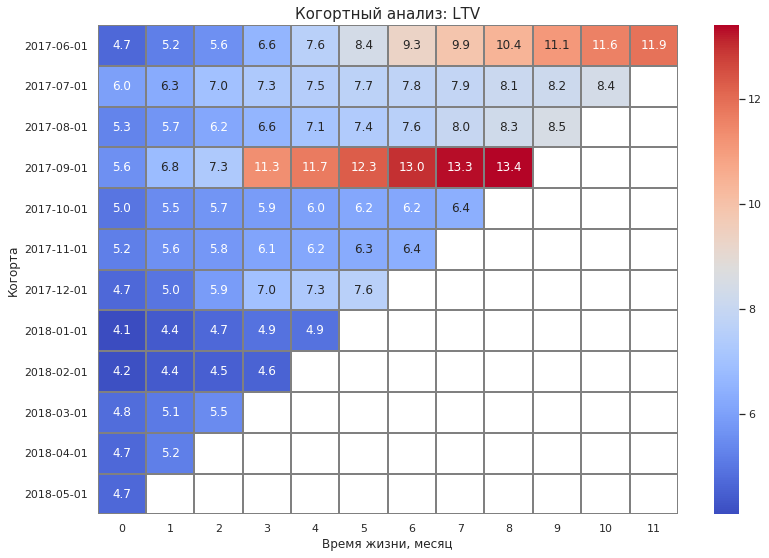

In [86]:
report['ltv'] = report['gp'] / report['n_buyers']
    
ltv = report.pivot_table(
        index='first_order_month', 
        columns='lifetime', 
        values='ltv', 
        aggfunc='mean').cumsum(axis=1).round(1)
    
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когортный анализ: LTV', fontsize = 15)
ax = sns.heatmap(ltv, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap= 'coolwarm')
ax.set(xlabel= 'Время жизни, месяц',
           ylabel= 'Когорта')
ax.set_yticklabels(ltv.index.date)
plt.show()

Вычислим средний LTV за 3, 6, 9 и 12 месяцев жизни.

In [87]:
m3_cum_ltv = ltv.mean(axis=0)[2]
m6_cum_ltv = ltv.mean(axis=0)[5]
m9_cum_ltv = ltv.mean(axis=0)[8]
m12_cum_ltv = ltv.mean(axis=0)[11]
print('Средний LTV за 3 месяца после первой покупки:', m3_cum_ltv)
print('Средний LTV за 6 месяцев после первой покупки:', m6_cum_ltv)
print('Средний LTV за 9 месяцев после первой покупки:', m9_cum_ltv)
print('Средний LTV за 12 месяцев после первой покупки:', m12_cum_ltv)

Средний LTV за 3 месяца после первой покупки: 5.82
Средний LTV за 6 месяцев после первой покупки: 7.985714285714286
Средний LTV за 9 месяцев после первой покупки: 10.05
Средний LTV за 12 месяцев после первой покупки: 11.9


Рассмотрим, как LTV отличается по рекламным источникам. Для это в таблицу с месяцем первой покупки для каждого покупателя добавим информацию по рекламному источнику из таблицы `visits`.

In [88]:
first_orders = first_orders.merge(visits.query('session_start_ts == first_activity_date')[['uid', 'source_id']], on='uid')
first_orders.head()

,uid,first_order_month,source_id
0,313578113262317,2018-01-01,2
1,1575281904278712,2017-06-01,10
2,2429014661409475,2017-10-01,3
3,2464366381792757,2018-01-01,5
4,2551852515556206,2017-11-01,5


In [89]:
first_orders.head()

,uid,first_order_month,source_id
0,313578113262317,2018-01-01,2
1,1575281904278712,2017-06-01,10
2,2429014661409475,2017-10-01,3
3,2464366381792757,2018-01-01,5
4,2551852515556206,2017-11-01,5


Посчитаем количество новых покупателей по месяцу и рекламному источнику.

In [90]:
n_buyers_by_source = first_orders.groupby(['first_order_month', 'source_id'])['uid'].nunique().reset_index()
n_buyers_by_source.columns = ['first_order_month', 'source_id', 'n_buyers']
n_buyers_by_source.head()

,first_order_month,source_id,n_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


Добавим информацию по рекламному источнику для каждого покупателя в таблицу заказов.

In [91]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head()

,order_date,revenue,uid,order_month,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3


Посчитаем выручку для каждой когорты, сформированной по месяцу первого заказа и источнику, по месяцам.

In [92]:
report_by_source = orders_new.groupby(['first_order_month', 'order_month', 'source_id']).agg({'revenue': 'sum'}).reset_index()
report_by_source.head()

,first_order_month,order_month,source_id,revenue
0,2017-06-01,2017-06-01,1,1378.70
1,2017-06-01,2017-06-01,2,1043.68
2,2017-06-01,2017-06-01,3,2804.34
3,2017-06-01,2017-06-01,4,1959.84
4,2017-06-01,2017-06-01,5,1898.89


Добавим к отчету количество новых пользователей для каждой когорты.

In [93]:
report_by_source = report_by_source.merge(n_buyers_by_source, on=['first_order_month', 'source_id'])
report_by_source.head()

,first_order_month,order_month,source_id,revenue,n_buyers
0,2017-06-01,2017-06-01,1,1378.70,190
1,2017-06-01,2017-07-01,1,414.98,190
2,2017-06-01,2017-08-01,1,419.43,190
3,2017-06-01,2017-09-01,1,714.24,190
4,2017-06-01,2017-10-01,1,811.20,190


Рассчитаем валовую прибыль и LTV по времени жизни когорты.

In [94]:
report_by_source['gp'] = report_by_source['revenue'] * margin_rate
report_by_source['lifetime'] = (report_by_source['order_month'] - report_by_source['first_order_month']) / np.timedelta64(1, 'M')
report_by_source['lifetime'] = report_by_source['lifetime'].round().astype('int')
report_by_source['ltv'] = report_by_source['gp'] / report_by_source['n_buyers']
report_by_source.head()

,first_order_month,order_month,source_id,revenue,n_buyers,gp,lifetime,ltv
0,2017-06-01,2017-06-01,1,1378.70,190,1378.70,0,7.256316
1,2017-06-01,2017-07-01,1,414.98,190,414.98,1,2.184105
2,2017-06-01,2017-08-01,1,419.43,190,419.43,2,2.207526
3,2017-06-01,2017-09-01,1,714.24,190,714.24,3,3.759158
4,2017-06-01,2017-10-01,1,811.20,190,811.20,4,4.269474


Отобразим LTV нарастающим итогом.

In [95]:
final_result = report_by_source.pivot_table(
    index=['first_order_month', 'source_id'], 
    columns='lifetime', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1).round(1).reset_index()
final_result.columns = ['first_order_month', 'source_id', '0', '1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
final_result

,first_order_month,source_id,0,1,2,3,4,5,6,7,8,9,10,11
0,2017-06-01,1,7.3,9.4,11.6,15.4,19.7,21.7,24.3,26.8,29.1,30.8,32.0,33.6
1,2017-06-01,2,4.4,4.9,5.2,7.1,8.8,9.7,11.3,12.8,14.1,14.9,16.2,16.7
2,2017-06-01,3,4.4,4.5,4.7,5.0,5.2,5.4,5.5,5.5,5.6,5.6,5.7,5.7
3,2017-06-01,4,4.7,4.8,5.0,5.4,6.6,8.1,9.5,9.7,9.9,10.7,12.0,12.1
4,2017-06-01,5,4.9,5.8,6.3,7.2,7.8,8.1,9.0,9.6,10.2,11.1,11.3,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2018-05-01,3,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,2018-05-01,4,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2018-05-01,5,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,2018-05-01,9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вычислим среднюю ценность покупателя за первые 3, 6, 9 и 12 месяцев для каждого рекламного источника.

In [96]:
columns = ['2', '5', '8', '11']
ltv_by_source = []
for i in columns:
    i_ltv = final_result.groupby(['source_id'])[i].mean().tolist()
    ltv_by_source.append(i_ltv)
ltv_by_source = pd.DataFrame(ltv_by_source, columns = final_result.groupby(['source_id'])['2'].mean().index.tolist())
ltv_by_source

,1,2,3,4,5,7,9,10
0,8.870000,9.990,5.090000,4.960000,5.590000,NaN,4.570000,3.500000
1,12.014286,15.500,5.728571,6.042857,9.342857,NaN,5.814286,3.933333
2,19.100000,14.925,6.450000,7.550000,13.225000,NaN,7.275000,2.900000
3,33.600000,16.700,5.700000,12.100000,11.400000,NaN,NaN,NaN


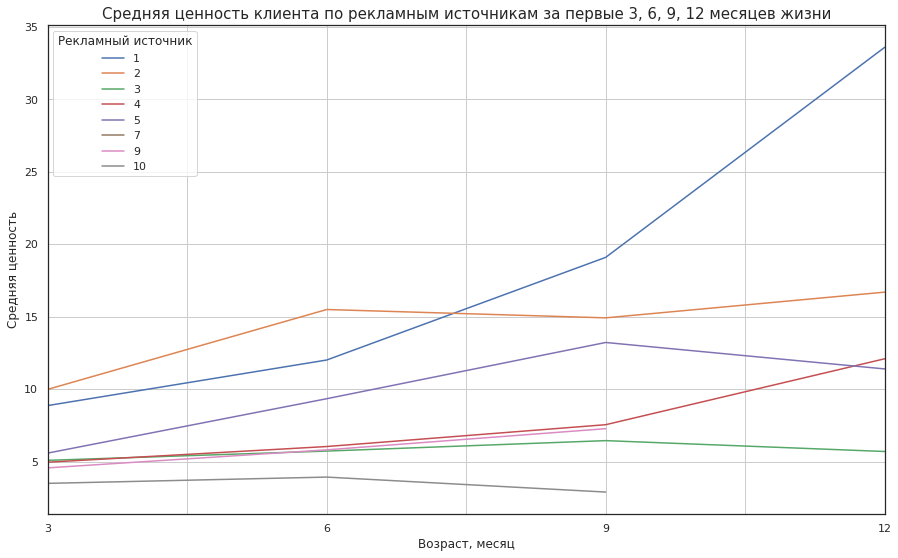

In [97]:
ax = ltv_by_source.plot(figsize=(15,9), rot=0, legend=True, grid=True)
plt.title('Средняя ценность клиента по рекламным источникам за первые 3, 6, 9, 12 месяцев жизни', fontsize = 15)
plt.ylabel('Средняя ценность', fontsize=12)
plt.xlabel('Возраст, месяц', fontsize=12)
plt.legend(title = 'Рекламный источник')
ax.set_xticklabels(['3', '', '6', '', '9', '', '12' '',])
plt.show()

Самый высокий показатель LTV второго рекламного источника после 9 месяцев идет на спад. Рассмотрим подробнее ценность покупателей из 2 источника.

In [98]:
final_result.query('source_id == 2')

,first_order_month,source_id,0,1,2,3,4,5,6,7,8,9,10,11
1,2017-06-01,2,4.4,4.9,5.2,7.1,8.8,9.7,11.3,12.8,14.1,14.9,16.2,16.7
8,2017-07-01,2,8.4,9.2,9.3,9.6,10.0,10.2,10.5,10.6,10.7,11.0,11.3,NaN
15,2017-08-01,2,5.7,6.7,6.9,7.1,7.6,7.7,7.8,8.2,8.2,8.3,NaN,NaN
23,2017-09-01,2,8.3,16.4,18.8,19.7,21.1,22.1,25.4,26.2,26.7,NaN,NaN,NaN
30,2017-10-01,2,7.7,10.1,10.8,11.3,11.9,12.2,12.3,12.5,NaN,NaN,NaN,NaN
37,2017-11-01,2,7.0,7.9,8.3,9.1,9.4,9.6,9.7,NaN,NaN,NaN,NaN,NaN
44,2017-12-01,2,8.8,10.4,19.7,30.8,33.8,37.0,NaN,NaN,NaN,NaN,NaN,NaN
51,2018-01-01,2,4.3,5.4,7.2,7.4,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2018-02-01,2,5.4,6.1,6.4,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,2018-03-01,2,5.3,6.0,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Высокий показатель среднего LTV для второго источника связан с резким повышением показателя для когорты сентября 2017 года сперва во втором месяце с 8,7 до 15,7, а затем в четвертом месяце с 18,2 до 49,3. Т.к. данных для этой когорты за 10-12 месяцы жизни нет, то график среднего LTV для второго источника идет вниз.

#### Вывод

В среднем ценность клиента за год составляет 11.9. Больше всего денег за год приносят покупатели, пришедшие из 1 рекламного источника. За год ценность такого клиента равна 34,6.  При этом покупатели из 2 рекламного источника имеют наибольшую ценность за первые 3, 6 и 9 месяцев, на 12 месяц выручка от этой группы падает.  
Самые низкие показатели LTV у источников 10 и 7: из этих источников приходит мало посетителей и покупателей.

### 3.3 Маркетинг <a id="marketing"></a>

#### Сколько денег потратили? <a id="costs"></a>

Рассмотрим общие расходы на маркетинг и расходи по месяцам.

In [99]:
costs['costs'].sum()

329131.62

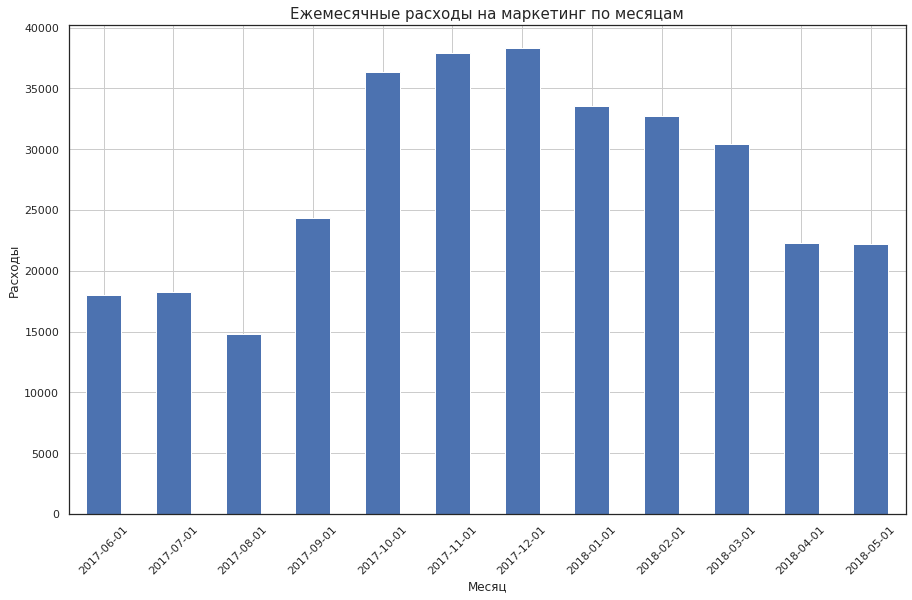

In [100]:
costs['month'] = costs['date'].astype('datetime64[M]')
monthly_costs = costs.groupby('month')['costs'].sum()
ax = monthly_costs.plot(figsize=(15,9), kind = 'bar', legend=False, grid=True, rot = 45)
plt.title('Ежемесячные расходы на маркетинг по месяцам', fontsize = 15)
plt.ylabel('Расходы', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
ax.set_xticklabels(monthly_costs.index.date)
plt.show()

Посчитаем расходы по рекламным источникам и посмотрим, как они менялись по месяцам.

In [101]:
costs.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [102]:
costs_per_month = costs.pivot_table(
        index='month', 
        columns='source_id', 
        values='costs', 
        aggfunc='sum')

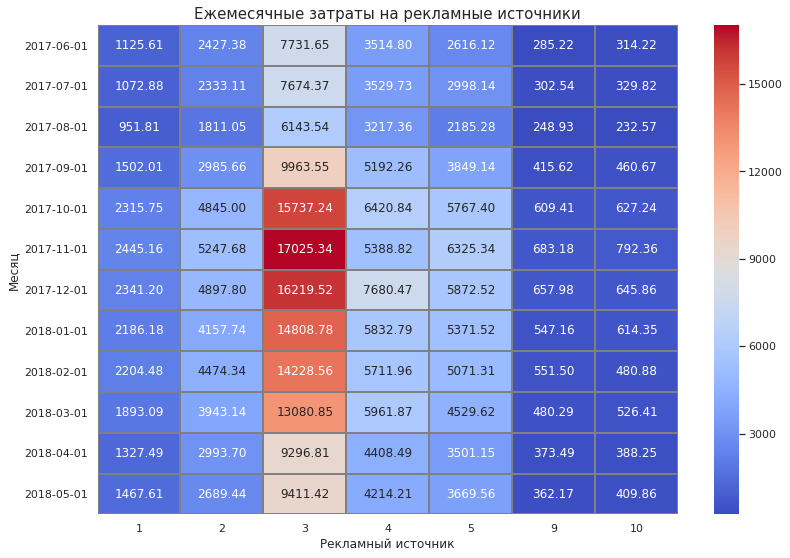

In [103]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Ежемесячные затраты на рекламные источники', fontsize = 15)
ax = sns.heatmap(costs_per_month, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm')
ax.set(xlabel= 'Рекламный источник',
           ylabel= 'Месяц')
ax.set_yticklabels(costs_per_month.index.date)
plt.show()

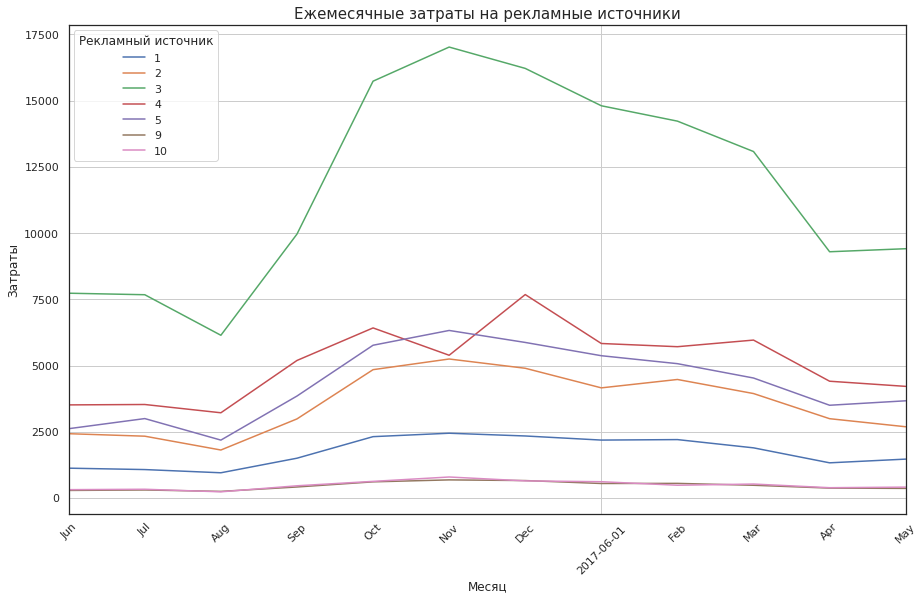

In [104]:
ax = costs_per_month.plot(figsize=(15,9), rot=45, legend=True, grid=True)
plt.title('Ежемесячные затраты на рекламные источники', fontsize = 15)
plt.ylabel('Затраты', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.legend(title = 'Рекламный источник')
ax.set_xticklabels(costs_per_month.index.date)
plt.show()

#### Вывод

Повышение посещаемости сайта и количества продаж с октября по март было вызвано не только сезонностью на посещаемость мероприятий, но и с увеличением затрат на маркетинг. Самые большие затраты - на третий рекламный источник с октября 2017 по март 2018, пик приходится на ноябрь 2017 (затраты составили 17025). Затраты на 9 и 10 источники самые низкие. Источники 6, 7, 8 вовсе не финансируются.

#### Сколько стоило привлечение одного покупателя из каждого источника? <a id="CAC"></a>

Рассмотрим CAC (от англ. customer acquisition cost) — стоимость привлечения клиента. 

Добавим данные о расходах в отчёт и посчитаем CAC каждой когорты.

In [105]:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,first_order_month,n_buyers,order_month,revenue,gp,lifetime,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,18015.0,8.905091


In [106]:
monthly_cac = report_new.groupby('first_order_month')['cac'].mean()
monthly_cac

first_order_month
2017-06-01     8.905091
2017-07-01     9.485486
2017-08-01    10.796015
2017-09-01     9.441654
2017-10-01     8.369327
2017-11-01     9.288870
2017-12-01     8.741809
2018-01-01     9.937302
2018-02-01     8.962758
2018-03-01     8.608907
2018-04-01     9.793225
2018-05-01     7.437841
Name: cac, dtype: float64

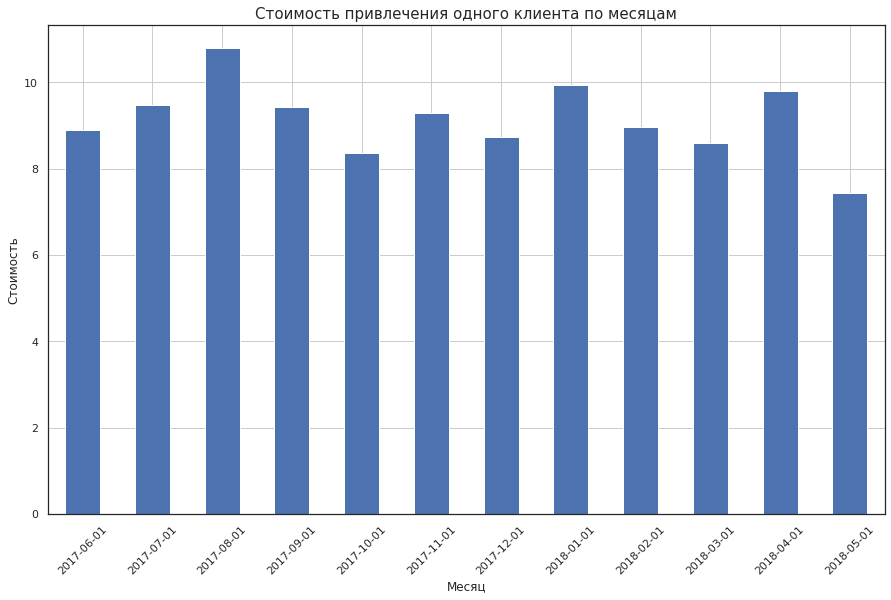

In [107]:
ax = monthly_cac.plot(figsize=(15,9), kind = 'bar', legend=False, grid=True, rot = 45)
plt.title('Стоимость привлечения одного клиента по месяцам', fontsize = 15)
plt.ylabel('Стоимость', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
ax.set_xticklabels(monthly_cac.index.date)
plt.show()

Рассмотрим показатель САС для рекламных источников, исключим 7 источник, т.к. для него нет затрат.

In [108]:
first_orders_date = orders.groupby('uid').agg({'order_date': 'min'}).reset_index()
first_orders_date.columns = ['uid', 'first_order_date']
first_orders_date.head()

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [109]:
first_orders_date = first_orders_date.merge(visits.query('session_start_ts == first_activity_date')[['uid', 'source_id']], on='uid')
first_orders_date.head()

,uid,first_order_date,source_id
0,313578113262317,2018-01-03 21:51:00,2
1,1575281904278712,2017-06-03 10:13:00,10
2,2429014661409475,2017-10-11 18:33:00,3
3,2464366381792757,2018-01-28 15:54:00,5
4,2551852515556206,2017-11-24 10:14:00,5


In [110]:
first_orders_date['first_order_date'] = first_orders_date['first_order_date'].dt.date
n_buyers_by_source_and_day = first_orders_date.groupby(['first_order_date', 'source_id'])['uid'].nunique().reset_index()
n_buyers_by_source_and_day.columns = ['first_order_date', 'source_id', 'n_buyers']
n_buyers_by_source_and_day.head()

,first_order_date,source_id,n_buyers
0,2017-06-01,1,14
1,2017-06-01,2,11
2,2017-06-01,3,33
3,2017-06-01,4,10
4,2017-06-01,5,13


In [111]:
costs['date'] = costs['date'].dt.date

In [112]:
cac_by_source_by_date = costs.merge(
    n_buyers_by_source_and_day, 
    left_on = ('source_id', 'date'), 
    right_on = ('source_id', 'first_order_date'))
cac_by_source_by_date.head()

,source_id,date,costs,month,first_order_date,n_buyers
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,14
1,1,2017-06-02,62.25,2017-06-01,2017-06-02,7
2,1,2017-06-03,36.53,2017-06-01,2017-06-03,7
3,1,2017-06-04,55.00,2017-06-01,2017-06-04,3
4,1,2017-06-05,57.08,2017-06-01,2017-06-05,18


Рассчитаем стоимость привлечения покупателей из разных источников.

In [113]:
cac_by_source_by_date['cac'] = cac_by_source_by_date['costs'] / cac_by_source_by_date['n_buyers']
cac_by_source_by_date.head()

,source_id,date,costs,month,first_order_date,n_buyers,cac
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,14,5.371429
1,1,2017-06-02,62.25,2017-06-01,2017-06-02,7,8.892857
2,1,2017-06-03,36.53,2017-06-01,2017-06-03,7,5.218571
3,1,2017-06-04,55.00,2017-06-01,2017-06-04,3,18.333333
4,1,2017-06-05,57.08,2017-06-01,2017-06-05,18,3.171111


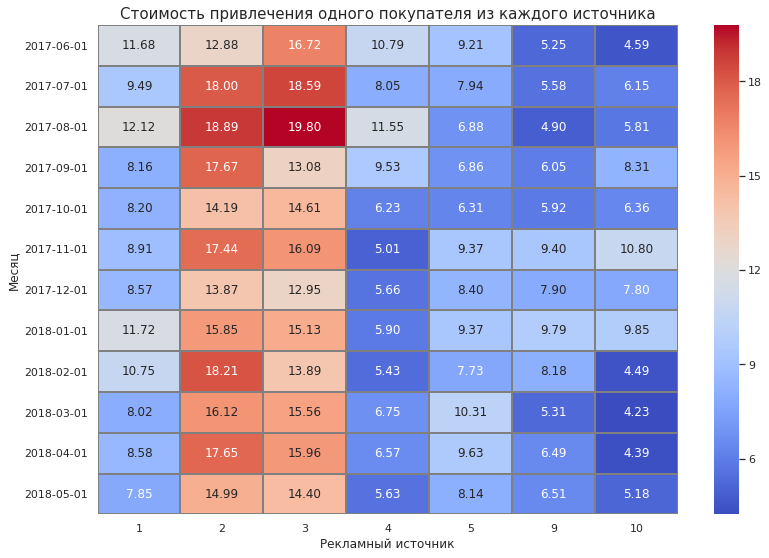

In [114]:
cac_by_source = cac_by_source_by_date.pivot_table(
        index='month', 
        columns='source_id', 
        values='cac', 
        aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Стоимость привлечения одного покупателя из каждого источника', fontsize = 15)
ax = sns.heatmap(cac_by_source, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm')
ax.set(xlabel= 'Рекламный источник',
           ylabel= 'Месяц')
ax.set_yticklabels(cac_by_source.index.date)
plt.show()

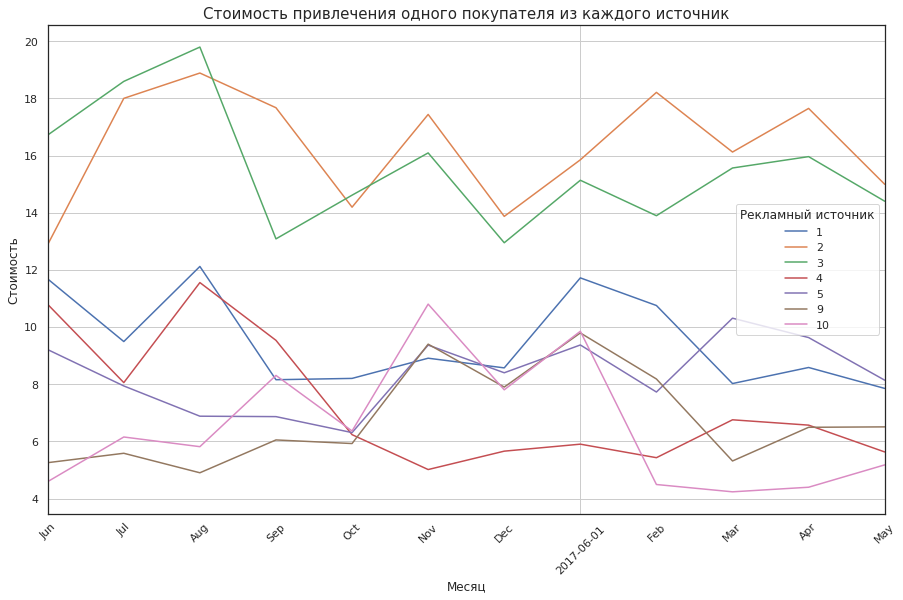

In [115]:
ax = cac_by_source.plot(figsize=(15,9), rot=45, legend=True, grid=True)
plt.title('Стоимость привлечения одного покупателя из каждого источник', fontsize = 15)
plt.ylabel('Стоимость', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.legend(title = 'Рекламный источник')
ax.set_xticklabels(cac_by_source.index.date)
plt.show()

In [116]:
cac_by_source.mean()

source_id
1      9.504800
2     16.314058
3     15.566601
4      7.259773
5      8.345224
9      6.774400
10     6.497916
dtype: float64

#### Вывод

Стоимость привлечения покупателя из 2 рекламного источника самая высокая - 16,3. На втором месте по CAC - третий рекламный источник: 15,6. Самые низкие показатели для 9 и 10 источников источника: 6,8 и 6,5 соответственно. Для этих же источников были одни из самых низких затрат на маркетинг.

#### На сколько окупились расходы? (ROI) <a id="ROMI"></a>

Рассчитаем возврат на инвестиции в маркетинг (ROMI): поделим LTV на CAC.

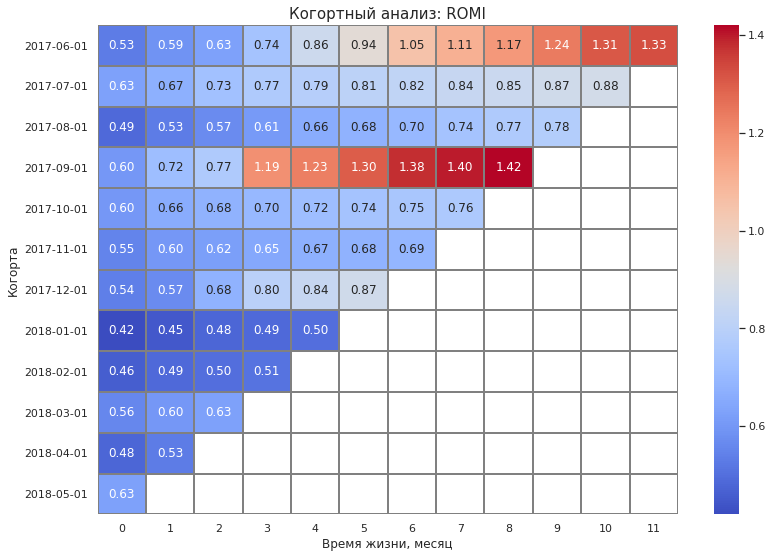

In [117]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
        index='first_order_month', 
        columns='lifetime', 
        values='romi', 
        aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когортный анализ: ROMI', fontsize = 15)
ax = sns.heatmap(output.cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm')
ax.set(xlabel= 'Время жизни, месяц',
           ylabel= 'Когорта')
ax.set_yticklabels(output.index.date)
plt.show()

Узнаем, как быстро в среднем когорты окупаются.

In [118]:
output.cumsum(axis=1).mean(axis=0) 

lifetime
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

В среднем окупаются на 9 месяц.

Рассчитаем ROMI для каждого источника. Для этого данные по LTV из таблицы `final_result` разделим на подходящий по когорте и времени жизни показатель CAC из таблицы `cac_by_source`. 

In [119]:
final_result['first_order_month'] = final_result['first_order_month'].dt.date

In [120]:
final_result

,first_order_month,source_id,0,1,2,3,4,5,6,7,8,9,10,11
0,2017-06-01,1,7.3,9.4,11.6,15.4,19.7,21.7,24.3,26.8,29.1,30.8,32.0,33.6
1,2017-06-01,2,4.4,4.9,5.2,7.1,8.8,9.7,11.3,12.8,14.1,14.9,16.2,16.7
2,2017-06-01,3,4.4,4.5,4.7,5.0,5.2,5.4,5.5,5.5,5.6,5.6,5.7,5.7
3,2017-06-01,4,4.7,4.8,5.0,5.4,6.6,8.1,9.5,9.7,9.9,10.7,12.0,12.1
4,2017-06-01,5,4.9,5.8,6.3,7.2,7.8,8.1,9.0,9.6,10.2,11.1,11.3,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2018-05-01,3,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,2018-05-01,4,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2018-05-01,5,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,2018-05-01,9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
cac_by_source.columns = ['1', '2', '3', '4', '5', '9', '10']
cac_by_source

,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,11.681283,12.883568,16.716919,10.792094,9.209676,5.253654,4.590158
2017-07-01,9.491485,18.000253,18.593952,8.054482,7.938157,5.582433,6.151880
2017-08-01,12.118898,18.886449,19.795068,11.554926,6.879620,4.900254,5.813398
2017-09-01,8.155731,17.672249,13.084043,9.533800,6.864844,6.049126,8.306581
2017-10-01,8.202083,14.193003,14.613088,6.233562,6.305969,5.923235,6.362921
2017-11-01,8.908503,17.437690,16.091445,5.013132,9.368019,9.400503,10.801337
2017-12-01,8.570439,13.871086,12.948321,5.656507,8.399174,7.899420,7.803197
2018-01-01,11.719181,15.850151,15.134989,5.901092,9.371755,9.792713,9.851557
2018-02-01,10.752216,18.209325,13.894612,5.428068,7.725369,8.181382,4.489624


Исключим из таблицы с LTV 7 источник, т.к. для него нет затрат, и рассчитаем ROMI.

In [122]:
romi = []
final_result_without_7 = final_result.query('source_id != 7').reset_index()
for row in range(len(final_result_without_7)):
    first_order_month = str(final_result_without_7.loc[row, 'first_order_month'])
    source_id = str(final_result_without_7.loc[row, 'source_id'])
    cac = cac_by_source.loc[first_order_month, source_id]
    romi_1 = final_result_without_7.loc[row, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']].tolist() / cac
    romi.append(romi_1)
    
romi = pd.DataFrame(romi, columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
romi

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.624931,0.804706,0.993042,1.318348,1.686459,1.857673,2.080251,2.294268,2.491165,2.636697,2.739425,2.876396
1,0.341520,0.380329,0.403615,0.551090,0.683041,0.752897,0.877086,0.993514,1.094417,1.156512,1.257416,1.296225
2,0.263206,0.269188,0.281152,0.299098,0.311062,0.323026,0.329008,0.329008,0.334990,0.334990,0.340972,0.340972
3,0.435504,0.444770,0.463302,0.500366,0.611559,0.750549,0.880274,0.898806,0.917338,0.991467,1.111925,1.121191
4,0.532049,0.629772,0.684063,0.781786,0.846935,0.879510,0.977233,1.042382,1.107531,1.205254,1.226970,1.237829
...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.270809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,0.834976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,0.515982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,0.568702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
romi = final_result_without_7[['first_order_month', 'source_id']].join(romi)
romi

,first_order_month,source_id,0,1,2,3,4,5,6,7,8,9,10,11
0,2017-06-01,1,0.624931,0.804706,0.993042,1.318348,1.686459,1.857673,2.080251,2.294268,2.491165,2.636697,2.739425,2.876396
1,2017-06-01,2,0.341520,0.380329,0.403615,0.551090,0.683041,0.752897,0.877086,0.993514,1.094417,1.156512,1.257416,1.296225
2,2017-06-01,3,0.263206,0.269188,0.281152,0.299098,0.311062,0.323026,0.329008,0.329008,0.334990,0.334990,0.340972,0.340972
3,2017-06-01,4,0.435504,0.444770,0.463302,0.500366,0.611559,0.750549,0.880274,0.898806,0.917338,0.991467,1.111925,1.121191
4,2017-06-01,5,0.532049,0.629772,0.684063,0.781786,0.846935,0.879510,0.977233,1.042382,1.107531,1.205254,1.226970,1.237829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2018-05-01,3,0.270809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,2018-05-01,4,0.834976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,2018-05-01,5,0.515982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2018-05-01,9,0.568702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выведем средний ROMI на каждый месяц жизни когорт.

In [124]:
columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
romi_by_source = []
for i in columns:
    romi1 = romi.groupby('source_id')[i].mean().tolist()
    romi_by_source.append(romi1)
romi_by_source = pd.DataFrame(romi_by_source, columns = ['1', '2', '3', '4', '5', '9', '10'])
romi_by_source

,1,2,3,4,5,9,10
0,0.679055,0.403062,0.298567,0.683803,0.598587,0.624244,0.537869
1,0.793094,0.498887,0.321576,0.699721,0.642222,0.676442,0.534751
2,0.932236,0.626508,0.329155,0.708198,0.700967,0.718211,0.543991
3,0.975175,0.771432,0.339538,0.733891,1.016657,0.815382,0.444043
4,1.100126,0.891873,0.351512,0.754733,1.119849,0.853306,0.405320
5,1.224977,1.007905,0.364836,0.795213,1.261836,0.962058,0.471855
6,1.383720,0.788930,0.368257,0.852717,1.402228,1.071161,0.456107
7,1.544495,0.875967,0.385823,0.765435,1.610359,1.228849,0.572115
8,1.811292,0.908468,0.389433,0.762156,1.798634,1.324618,0.480945
9,2.095631,0.735694,0.345249,0.778723,1.172461,1.257108,0.980494


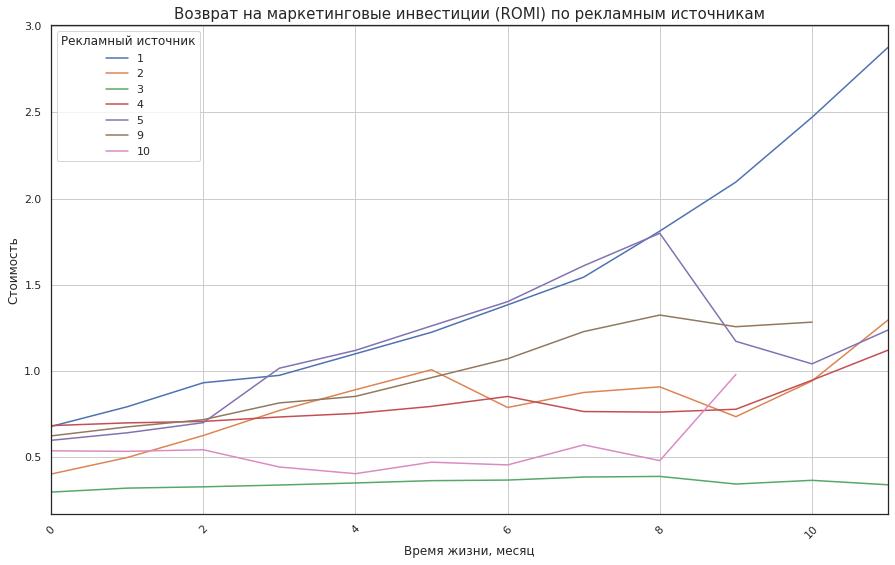

In [125]:
romi_by_source.plot(figsize=(15,9), rot=45, legend=True, grid=True)
plt.title('Возврат на маркетинговые инвестиции (ROMI) по рекламным источникам', fontsize = 15)
plt.ylabel('Стоимость', fontsize=12)
plt.xlabel('Время жизни, месяц', fontsize=12)
plt.legend(title = 'Рекламный источник')
plt.show()

#### Вывод

В среднем расходы на инвестиции в маркетинг окупаются к концу 9 месяца жизни когорты. К этому моменту окупаются инвестиции в маркетинг на источники 1, 5, 9. Самый большой возрат получили от первого рекламного источника. В среднем когорты из этого источника окупаются уже к концу второго месяца жизни, а через год возврат на инвестиции составляет 2,8. Инвестиции по 5 рекламному источнику окупаются уже к концу 4 месяца. Самые большие затраты, направленные на 3 рекламный источник, не окупились: возврат на инвестиции к концу 12 месяца составил 0,34. 

### 4. Общий вывод <a id="conclusion"></a>

Самым эффективным рекламным источником является 1. Расходы на данный источник окупаются уже к концу 5 месяца, а к концу 12 месяца ROMI составляет рекордные среди всех остальных ресурсов 2,9. Стоит продолжать инвестировать также во 5 и 9 источники. Инвестиции в 3 и 10 рекламные источники не окупаются. Стоит прекратить инвестирование этих каналов. При этом на 3 источник было направлено больше всего инвестиций за год = 141321.63 (более 40% от всех инвестиций за  год). А возврат на инвестиции очень низкий и растет очень медленно: в первом месяце 0,3, а через год всего 0,34. Рекомендую расходы на этот канал направить на 1 рекламный источник.  
При анализе метрик по устройствам, выявлено, что большинство пользователей заходят на сайт с desctop-устройств, продолжительность сессии и количество сессий в день на этих устройства больше, чем с touch-устройств. Поэтому при инвестировании стоит ориентироваться на desctop-устройства.